## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [334]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

### 作業1:

In [335]:
#第一步：讀取 iris 資料
iris = datasets.load_iris()
#print(iris.DESCR)

In [336]:
#第二步：切分訓練集/測試集:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

#第三步：訓練資料和測試資料做特徵標準化:
# N/A

#第四步：使用單一DecisionTreeClassification模型進行訓練，並且對測試資料進行預測
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

#第五步：對模型在測試集下進行效能評估: 正確性評估
acc = metrics.accuracy_score(y_test, y_pred)
print("clf - Acuuracy: ", acc)
clf.feature_importances_

clf - Acuuracy:  0.9736842105263158


array([0.01796599, 0.        , 0.52229134, 0.45974266])

In [337]:
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=2, min_samples_leaf=2, random_state=0)
#clf2 = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_split=2, min_samples_leaf=3, random_state=0)
clf2.fit(x_train, y_train)
y_pred_2 = clf2.predict(x_test)
acc_2 = metrics.accuracy_score(y_test, y_pred_2)
print("clf2 - Acuuracy: ", acc_2)
clf2.feature_importances_

clf2 - Acuuracy:  1.0


array([0.02817047, 0.        , 0.07800198, 0.89382756])

### 作業2.

In [338]:
#第一步：讀取 wine 資料
wine = datasets.load_wine()
print(wine.data.shape)
print(wine.target.shape)
#wine.DESCR

(178, 13)
(178,)


In [339]:
#第二步：切分訓練集/測試集:
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

#第三步：訓練資料和測試資料做特徵標準化:
# N/A

#第四步：使用單一DecisionTreeClassification模型進行訓練，並且對測試資料進行預測
clf = DecisionTreeClassifier()
#clf = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=3, min_samples_leaf=2)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=3, min_samples_leaf=2, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

#第五步：對模型在測試集下進行效能評估: 正確性評估
acc = metrics.accuracy_score(y_test, y_pred)
print("clf - Acuuracy: ", acc)
clf.feature_importances_

clf - Acuuracy:  0.9777777777777777


array([0.01812255, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.4176429 , 0.        , 0.        , 0.22104104,
       0.00608974, 0.        , 0.33710377])

In [340]:
#converting the numpy array to list
#x=np.array(y_pred).tolist()
#printing first 5 predictions

print("The prediction:\n")
print(y_pred)
print("The expectation:\n")
print(y_test)

index=0
for pred, test in zip(y_pred, y_test):
    if pred != test:
        print("index, pred, testY")
        print(index, pred, test," *\n")
    #else:
        #print(index, pred, test,"\n")
    index += 1


The prediction:

[2 2 0 0 1 2 0 1 0 1 1 0 2 2 0 1 0 1 1 2 1 2 1 2 0 2 1 1 2 2 0 1 0 1 2 2 0
 0 0 2 2 0 0 2 1]
The expectation:

[2 2 0 0 1 2 0 1 0 1 1 0 2 2 0 1 0 1 1 2 1 2 1 2 0 2 1 1 2 2 0 1 0 1 2 2 0
 0 0 2 2 0 0 1 1]
index, pred, testY
43 2 1  *



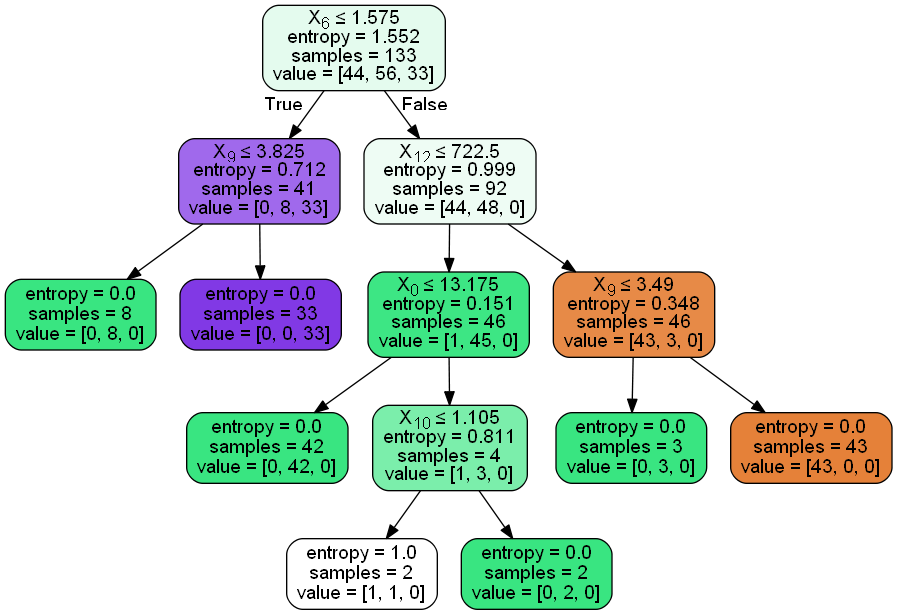

In [341]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())